In [50]:
%load_ext autoreload

%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sweep import Sweep
import os
import seaborn as sns
from scipy import stats

import scikit_posthocs as sp
import json

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
data_vc = Sweep('14 dpi/VC_test/2022-03-29_001_04.asc', names=['index','time','I-mon','stimulus','time2', 'V-mon', 'stimulus2', 'time3', 'leak','stimulus3'])

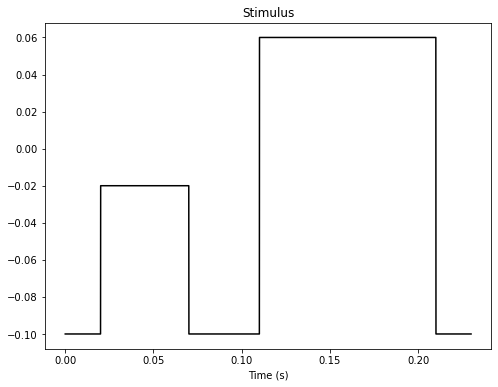

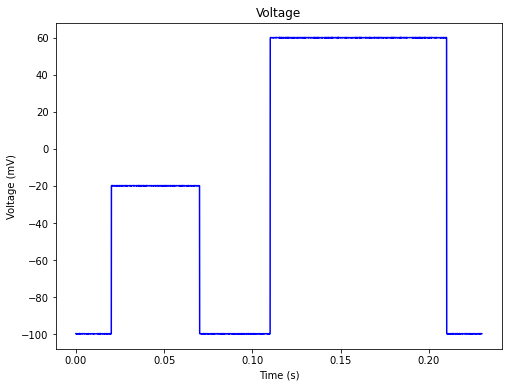

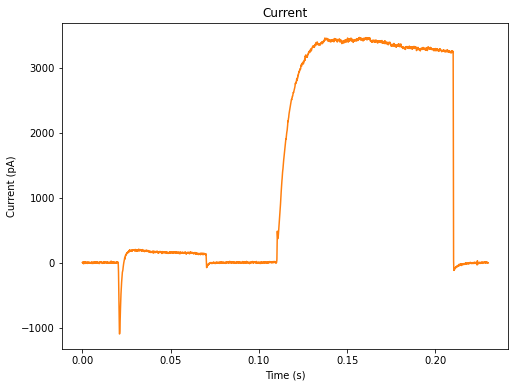

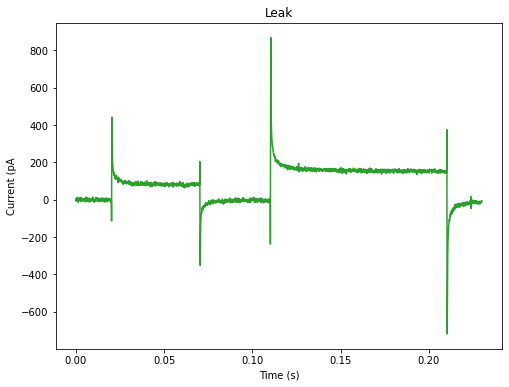

In [56]:
data_vc.plot()

In [4]:
inward_current = data_vc.current.min()
outward_current = data_vc.current.max()

In [5]:
inward_current

-443.8117929

In [6]:
outward_current

1630.232838

In [7]:
dpi14_path = '14 dpi/VC_test/'
dpi15_path = '15 dpi/VC_test/'
dpi16_path = '16 dpi/VC_test/'
dpi17_path = '17 dpi/VC_test/'
drg_path = 'DRG/VC_test/'

In [52]:
def get_currents(path):
    inward_currents = []
    outward_currents = []
    for filename in os.listdir(path):
        filepath = os.path.join(path, filename)
        print(filepath)
        data_vc = Sweep(filepath, names=['index','time','I-mon','stimulus','time2', 'V-mon', 'stimulus2', 'time3', 'leak','stimulus3'])
        inward_current = data_vc.current.min()
        outward_current = data_vc.current.max()
        inward_currents.append(inward_current/1000)
        outward_currents.append(outward_current/1000)
    return dict(zip(['inward currents', 'outward currents'], [inward_currents, outward_currents]))

In [53]:
all_currents = {'14dpi': get_currents(dpi14_path),
                '15dpi': get_currents(dpi15_path),
                '16dpi': get_currents(dpi16_path),
                '17dpi': get_currents(dpi17_path),
                'drg': get_currents(drg_path)}

14 dpi/VC_test/2022-03-29_001_01.asc
14 dpi/VC_test/2022-03-29_001_02.asc
14 dpi/VC_test/2022-03-29_001_03.asc
14 dpi/VC_test/2022-03-29_001_04.asc
14 dpi/VC_test/2022-03-29_001_05.asc
14 dpi/VC_test/2022-03-29_001_06.asc
14 dpi/VC_test/2022-03-29_001_07.asc
14 dpi/VC_test/2022-03-29_001_08.asc
14 dpi/VC_test/2022-03-29_001_09.asc
14 dpi/VC_test/2022-03-29_001_10.asc
14 dpi/VC_test/2022-03-29_001_12.asc
14 dpi/VC_test/2022-03-29_001_14.asc
14 dpi/VC_test/2022-03-29_001_15.asc
14 dpi/VC_test/2022-03-29_001_16.asc
14 dpi/VC_test/2022-03-29_001_18.asc
14 dpi/VC_test/2022-03-29_001_19.asc
14 dpi/VC_test/2022-03-29_001_20.asc
15 dpi/VC_test/2022-03-30_001_04.asc
15 dpi/VC_test/2022-03-30_001_05.asc
15 dpi/VC_test/2022-03-30_001_07.asc
15 dpi/VC_test/2022-03-30_001_09.asc
15 dpi/VC_test/2022-03-30_001_11.asc
15 dpi/VC_test/2022-03-30_001_12.asc
15 dpi/VC_test/2022-03-30_001_13.asc
15 dpi/VC_test/2022-03-30_001_14.asc
15 dpi/VC_test/2022-03-30_001_15.asc
15 dpi/VC_test/2022-03-30_001_16.asc
1

In [54]:
with open("Currents.json", "w") as outfile:
    json.dump(all_currents, outfile, indent=4)

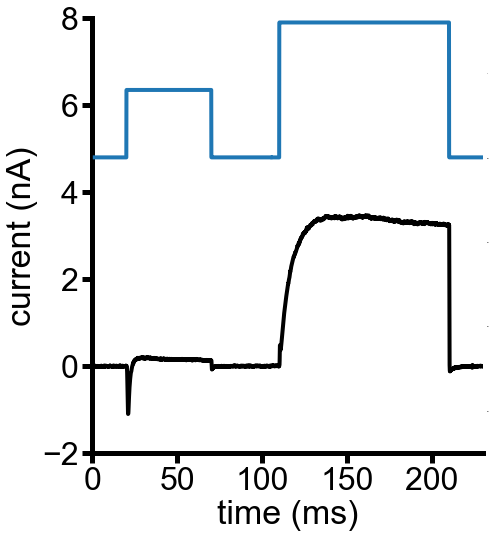

In [106]:
fig, ax1 = plt.subplots(figsize=(7,8))
ax1.plot(data_vc.time[0]*1000, data_vc.current[0]/1000, c='k',linewidth=4)


ax = plt.gca()
ax.set_xlim([0, 230])
ax.set_ylim([-2, 8])
ax.tick_params(length=6, width=4)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines['left'].set_linewidth(5)
ax1.spines['bottom'].set_linewidth(5)
ax.tick_params(length=10, width=5)
#ax.spines['left'].set_bounds(-800, -600)
plt.xticks(fontsize=32, fontname='Arial')
plt.yticks(fontsize=32, fontname='Arial')

plt.xlabel('time (ms)', fontsize=34, fontname='Arial')
plt.ylabel('current (nA)', fontsize=34,fontname='Arial')

ax2 = ax1.twinx()
ax2.spines["top"].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.yticks(fontsize=0)
ax2.tick_params(length=0, width=0)

#plt.ylabel('voltage (mV)', fontsize=34,fontname='Arial', color='C0')
ax2.plot(data_vc.time[0]*1000, data_vc.voltage[0], c='C0',linewidth=4)
ax2.set_ylim([-450, 65])
#ax.text(y=5, x=80, s='-100mV',  fontname="Arial", fontweight='bold', fontsize=26)


plt.savefig('Currents_-20_60.png', bbox_inches = "tight")   
plt.show() 

<Figure size 576x576 with 0 Axes>

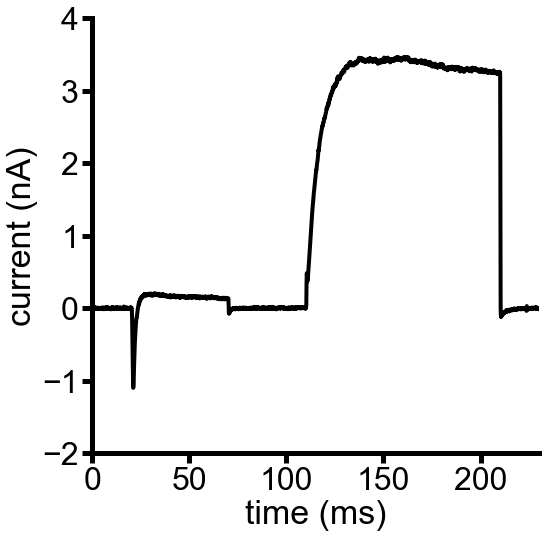

In [102]:
plt.figure(figsize=(8,8))

fig, ax1 = plt.subplots(figsize=(8,8))
ax1.plot(data_vc.time[0]*1000, data_vc.current[0]/1000, c='k',linewidth=4)


ax = plt.gca()
ax.set_xlim([0, 230])
ax.set_ylim([-2, 4])
ax.tick_params(length=6, width=4)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines['left'].set_linewidth(5)
ax1.spines['bottom'].set_linewidth(5)
ax.tick_params(length=10, width=5)
#ax.spines['left'].set_bounds(-800, -600)
plt.xticks(fontsize=32, fontname='Arial')
plt.yticks(fontsize=32, fontname='Arial')

plt.xlabel('time (ms)', fontsize=34, fontname='Arial')
plt.ylabel('current (nA)', fontsize=34,fontname='Arial')



plt.savefig('Currents.png', bbox_inches = "tight")   
plt.show() 